## 파일 읽기

- 파일 읽어서 해당 정보 확인하기
- 인코딩으로 데이터 읽어보고 실패시 CP949로 시도

In [45]:
# pandas 라이브러리 import
import pandas as pd


# 실습 csv 자료 읽어오기 (DataFrame 구조로 읽어옴) 
df = pd.read_csv('ESG_CO2_2021.csv')
print(df.head()) # 상위 5개 행 출력

     year          Net
0  1990.0  254159.2211
1  1991.0  281385.5253
2  1992.0  310216.9541
3  1993.0  346994.1520
4  1994.0  369637.1600


## 데이터 로드 및 기본 정보 확인

- pandas, numpy 이용
- 데이터 확인 (df.info(), df.head(), df.describe())

* head() : 기본 5개의 행 // head(3) : 3개의 행

In [46]:
print(df.info()) # 해당 DataFrame의 정보 출력
print()
print('-'*100)
print()
print(df.head) # 상위 5개의 행 출력
print()
print('-'*100)
print()
print(df.describe()) # 해당 DataFrame의 평균, 표준편차, 최소, 최대값 등 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    31 non-null     float64
 1   Net     30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes
None

----------------------------------------------------------------------------------------------------

<bound method NDFrame.head of       year          Net
0   1990.0  254159.2211
1   1991.0  281385.5253
2   1992.0  310216.9541
3   1993.0  346994.1520
4   1994.0  369637.1600
5   1995.0          NaN
6   1996.0  434432.7187
7   1997.0  461298.0841
8   1998.0          NaN
9      NaN  412334.4732
10  2000.0  442635.7351
11  2001.0  456469.1168
12  2002.0  481101.1682
13  2003.0  491936.6703
14  2004.0  498765.4611
15  2005.0  505161.0965
16  2006.0  509455.9762
17  2007.0  522071.0537
18  2008.0  534495.4289
19  2009.0  538470.5269
20  2010.0  599016.3944
21  2011.0  628553.1186
22  2012.0  637

## 데이터 정제 및 전처리

- 결측치 확인 및 처리
- 데이터 타입 확인 및 변환

In [47]:
# 결측치 확인
print("각 열의 결측치 개수 및 데이터 타입")
print(df.isnull().sum()) # 각 열별 결측치 개수 확인 
print('-'*100)
print("\n각 행의 결측치 여부 확인")
print(df.isnull()) # 각 행의 결측치 여부 확인

print("-"*100)
print("결측치 삭제 - dropna() 사용\n")
df_dropped_col = df.dropna(subset=['year'], inplace=True) # year 열에서 결측치가 있는 행만 삭제 (1999년)
print(df_dropped_col)

print("-"*100)
print("결측치 대체 - fillna() 사용\n")
df_filled = df.copy()
df_filled['Net'].fillna(df['Net'].min(), inplace=True) # inplace 속성 값이 True -> 원본 DataFrame 수정 // False -> 새로운 Data Frame 생성 후 반환
print(df_filled)



각 열의 결측치 개수 및 데이터 타입
year    1
Net     2
dtype: int64
----------------------------------------------------------------------------------------------------

각 행의 결측치 여부 확인
     year    Net
0   False  False
1   False  False
2   False  False
3   False  False
4   False  False
5   False   True
6   False  False
7   False  False
8   False   True
9    True  False
10  False  False
11  False  False
12  False  False
13  False  False
14  False  False
15  False  False
16  False  False
17  False  False
18  False  False
19  False  False
20  False  False
21  False  False
22  False  False
23  False  False
24  False  False
25  False  False
26  False  False
27  False  False
28  False  False
29  False  False
30  False  False
31  False  False
----------------------------------------------------------------------------------------------------
결측치 삭제 - dropna() 사용

None
----------------------------------------------------------------------------------------------------
결측치 대체 - fillna() 사용

      year       

/tmp/ipykernel_123239/1094575770.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Net'].fillna(df['Net'].min(), inplace=True) # inplace 속성 값이 True -> 원본 DataFrame 수정 // False -> 새로운 Data Frame 생성 후 반환


## 데이터 시각화

- 꺾은선 그래프, 범례 추가
- 그래프 이미지 변환 (plt.savefig(image_file_path))

In [48]:
# seaborn 라이브러리 사용을 위해 사전 설치
!pip install seaborn    # 파이썬 코드 앞에 !를 붙이면 터미널 명령어로 실행하게 됨

Defaulting to user installation because normal site-packages is not writeable


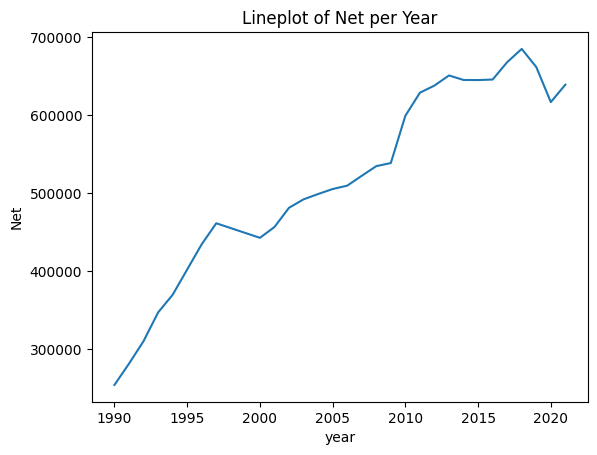

<Figure size 640x480 with 0 Axes>

In [49]:
# 데이터 시각화를 위한 matplotlib 라이브러리의 pyplot 모듈 import
import matplotlib.pyplot as plt
# Seaborn 라이브러리 import - Data Frame을 직접 입력할 수 있음
import seaborn as sns

# x축에는 Year, Y축에는 Net을 표시하는 선 그래프 생성 (df에 저장된 DataFrame 사용)
sns.lineplot(data=df, x='year', y='Net')    # Data Frame 내에 실제로 존재하는 Column 명칭 사용

# 연도별 Net 그래프
plt.title("Lineplot of Net per Year") # 한글 폰트 없기 때문에 영어로 표 이름 할당
# 범례(legend 추가)
# plt.legend(loc = "lower right") # 범례 좌측 하단에 위치시키기 -> but seaborn의 hue 속성을 사용하면 자동으로 범례 추가됨
plt.show()
# 생성한 그래프 이미지로 변환 및 저장
plt.savefig("Lineplot of Net per Year")

## 데이터 분석 및 예측

- 선형회귀모델 학습(사이킷런 후 5년 데이터 예측 (np.arange())
- 그래프 이미지 변환

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = df_filled # 결측치 없는 Data Frame으로 교체

# 독립변수(X)와 종속변수(y) 분리
X = df[['year']] # 년도
y = df['Net'] # 탄소 배출량

# 데이터 분리 : 학습용(80%), 테스트용(20%) // 테스트용은 80%의 데이터를 사용해서 학습시킨 모델의 성능을 평가하기 위해 남겨놓은 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state -> 재현 가능성을 보장하기 위한 랜덤 시드 고정 (임의의 값 할당해서 고정)

# 모델 생성 및 학습
model = LinearRegression()  # 선형 회귀 모델
model.fit(X_train, y_train)
'''
fit() 함수는 훈련 데이터(X_train, y_train)를 사용하여 모델을 학습하는 역할을 합니다.
이 과정에서 모델이 최적의 직선(회귀선)의 기울기(w)와 절편(b)을 찾음.

- 훈련 과정 -
1. X_train(입력값)과 y_train(정답값)을 비교하면서 오차를 최소화하는 직선을 찾음.
2. 오차를 줄이는 방향으로 기울기(w)와 절편(b)을 조정.
3. 학습이 완료되면 model.predict()를 사용하여 새로운 데이터를 예측 가능.
'''

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 평가: 평균 제곱 오차(MSE) -> 예측한 값과 실제 값의 차이를 측정하는 지표
# MSE 값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)

# 평가: 결정계수(R^2)
'''
 독립변수가 종속변수를 얼마나 잘 설명하는가
 r^2 = 1 - (설명되지 않은 변동 / 총 변동)   =>  설명된 변동의 정돈을 알려주는 값
 0~1 사이의 값으로, 일반적으로 값이 클수록 좋은 모델임
 but, 과적합 문제(훈련 데이터에는 잘 맞지만, 새로운 데이터에는 성능이 좋지 않은 문제)가 발생할 수 있기 때문에 r^2 값이 높다고 무저건 좋다고는 할 수 없음
 '''

r2 = r2_score(y_test, y_pred)
print("결정계수(R²):", r2)

# 결과 확인
print("실제 값:", list(y_test))
print("예측 값:", list(y_pred))


평균 제곱 오차(MSE): 4641658641.310595
결정계수(R²): 0.7475567839686168
실제 값: [684683.6421, 509455.9762, 644902.0978, 534495.4289, 254159.2211, 442635.7351, 616558.8974]
예측 값: [681037.9830115326, 516862.6691315286, 626312.8783848658, 544225.2214448638, 407412.4598781951, 434775.0121915266, 708400.5353248678]


#### 향후 5년의 탄소배출량 예측 값 받은 뒤, 그래프로 출력하기

   year  Predicted Net
0  2022  735763.087638
1  2023  749444.363795
2  2024  763125.639952
3  2025  776806.916108
4  2026  790488.192265


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


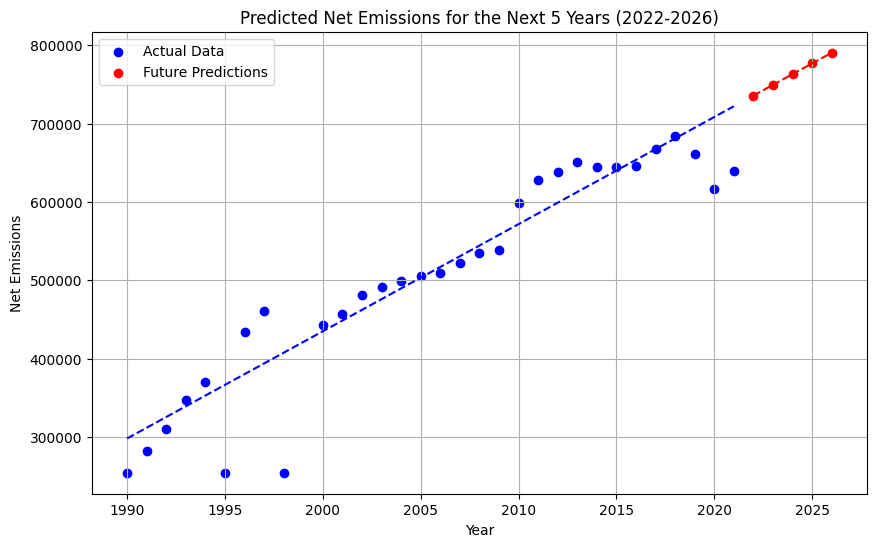

In [51]:
# 향후 5년(2022~2026년)의 탄소 배출량 예측
future_years = np.array([2022, 2023, 2024, 2025, 2026]).reshape(-1, 1)  # 향후 5년 데이터 // reshape 
'''
# reshape 메소드의 역할
sklearn의 LinearRegression().predict() 메서드는 2차원 배열을 입력값으로 요구함
따라서 1차월 배열 구조로 들어온 데이터 구조를 2차원 형태로 변환해주는 메소드

reshape(원하는 행 개수, 원하는 열 개수)

reshape(-1, 1)에서 -1의 의미
🔹 -1을 사용하면 자동 계산
reshape(-1, 1)에서 -1은 행(row) 개수를 자동으로 계산하라는 의미
그에 대한 반환 값으로 위의 예제의 경우에는 5개의 값을 가진 배열이 들어갔으므로, 
5개의 행과 1개의 열을 가진 2차원 배열로 변환되어 반환됨
'''
future_predictions = model.predict(future_years)    # 예측하고자 하는 년도들의 값을 배열로 모델에 전달하여 예측값 받기

# 결과 출력
future_data = pd.DataFrame({"year": future_years.flatten(), "Predicted Net": future_predictions})
print(future_data)

# 기존 데이터 그래프 - 파란색으로 출력
plt.figure(figsize=(10, 6))
plt.scatter(df["year"], df["Net"], color="blue", label="Actual Data")  # 각 실제 데이터 (산점도)
plt.plot(df["year"], model.predict(X), color="blue", linestyle="dashed")  # 기존 예측된 선

# 예측 데이터 그래프 - 빨간색으로 출력
plt.scatter(future_years, future_predictions, color="red", label="Future Predictions")  # 각 예측 데이터 (산점도)
plt.plot(future_years, future_predictions, color="red", linestyle="dashed")  # 예측된 선

# 그래프 설정
plt.xlabel("Year")  # x축 라벨
plt.ylabel("Net Emissions") # y축 하벨
plt.title("Predicted Net Emissions for the Next 5 Years (2022-2026)")   # 그래프 제목
plt.legend() # 범례 출력
plt.grid(True) # 그래프에 그리드 출력
plt.show()
